# Dimensionality Reduction

Dimensionality Reduction is exactly what it sounds like. These are techniques for reducing the dimensions.

## Why do we want to reduce the dimensions?

1. Remove multicolinearity
2. Deal with the *curse of dimensionality*
3. Remove redundant features
4. Interpretation & visualization
5. Make computations of algorithms easier
6. Discover hidden topics

## Feature Matrix
Our feature matrix has dimension $n \times p$:

#$$
X =
  \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1p} \\
    x_{21} & x_{22} & \cdots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{np} 
  \end{bmatrix}
$$

$n$ = the number of subjects  
$p$ = the number of features

## Standardize your dataset
We should always start by standardizing the dataset. This means:

1. Center the data for each feature by subtracting the mean
2. Divide by the standard deviation

    For each column feature vector($x$) the resulting transformed feature vector ($x^*$) will be:
    ## $x_i^* = \frac{x_i - \bar{x}}{s}$

## Covariance Matrix
Recall that the covariance matrix for features that have been centered about the mean is given by:

##$\frac{1}{n}X^T X$

Note: The covariance matrix of fully standardized variables gives us the correlation matrix.

## Example
Take the following feature matrix:

$\begin{bmatrix}
 10 & 3 \\
 10 & 4 \\
 40 & 7 \\
 60 & 6 \\
 70 & 9 \\
100 & 7 \\
100 & 8
\end{bmatrix}$

This is the feature matrix after we standardize it:

$\begin{bmatrix}
-1.306 & -1.660 \\
-1.306 & -1.155 \\
-0.449 &  0.361 \\
 0.122 & -0.144 \\
 0.408 &  1.371 \\
 1.266 &  0.361 \\
 1.266 &  0.866
\end{bmatrix}$

This is the resulting covariance matrix:

$\begin{bmatrix}
1.0  & 0.801 \\
0.801 & 1.0
\end{bmatrix}$


Populating the interactive namespace from numpy and matplotlib
X:
[[-1.30639453 -1.65988202]
 [-1.30639453 -1.15470054]
 [-0.44907312  0.36084392]
 [ 0.12247449 -0.14433757]
 [ 0.40824829  1.37120689]
 [ 1.2655697   0.36084392]
 [ 1.2655697   0.8660254 ]]

covariance matrix:
[[ 1.          0.80138769]
 [ 0.80138769  1.        ]]


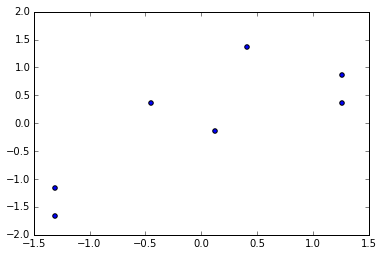

In [3]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler

data = np.array([[10., 3.], [10., 4.], [40., 7.], [60., 6.], [70., 9.], [100., 7.], [100., 8.]])
n = len(data)
X = StandardScaler().fit_transform(data)
print "X:"
print X
print
print "covariance matrix:"
print 1.0/n * X.T.dot(X)
plt.scatter(X[:,0], X[:,1]);

Since our features have been standardized, this tells us that the *correlation* between feature 1 and feature 2 is 0.801. This intuitively makes sense, since we can tell the two features are correlated by visual inspection.

The computations are done below with Python.

In [4]:
np.corrcoef(X,rowvar=0)

array([[ 1.        ,  0.80138769],
       [ 0.80138769,  1.        ]])

# Principal Components Analysis (PCA)

Usually we will get a covariance matrix with a lot of large values; however, our ideal covariance matrix would be one where all the off-diagonal values are 0. This would indicate that there is *no relationship between the features*. As luck would have it, we can transform the data to make this happen!

An ideal covariance matrix would look something like this:

$\begin{bmatrix}
10 & 0 & 0 \\
0  & 8 & 0 \\
0  & 0 & 2
\end{bmatrix}$

The idea is to find a new set of axes (i.e. a *basis*) that better fits the data and decorrelates the features.

We choose the first principal component to be in the direction of the most variance. Here's a look at what we're doing:

<img src="images/correlated_2d.png" align="left">
<br clear="all">

The green line here is in the direction of maximum variance. We make this our first axis.

We then choose the second dimension (the pink line) to be orthogonal (perpendicular) to the first. There is no longer any covariance between the two features (i.e. they've been decorrelated) after we rotate the data:

<img src="images/uncorrelated_2d.png" align="left">
<br clear="all">

## PCA Mathematically

Our goal is to find a transformation matrix $V$ which when applied to $X$ gives us our ideal covariance matrix:

$(XV)^T (XV) = V^TX^TXV =
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}$


$V$ is the new basis so it should look like this:

$V =
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix}$

Note that the $u_1, u_2, \ldots, u_p$ is an *orthonormal* basis.

An *orthonormal* basis means the vectors are:
1. all unit vectors (dot product = 1).
2. orthogonal to each other (dot product = 0)

So the following is true:

$\begin{align*}
V^TV 
&=
\begin{bmatrix}
- & u_1 & - \\
- & u_2 & - \\
- & u_3 & - \\
- & \vdots & - \\
- & u_p & -
\end{bmatrix}
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix} \\
&=
\begin{bmatrix}
u_1 \cdot u_1 & u_1 \cdot u_2 & \cdots & u_1 \cdot u_p \\
u_2 \cdot u_1 & u_2 \cdot u_2 & \cdots & u_2 \cdot u_p \\
\vdots & \vdots & \ddots & \vdots \\
u_p \cdot u_1 & u_p \cdot u_2 & \cdots & u_p \cdot u_p
\end{bmatrix} \\
&=
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix}
\end{align*}$

So $V^TV$ is the identity matrix which implies $V^T = V^{-1}$

Back to the original equation of our ideal world:

$\begin{align*}
V^TX^TXV &=
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}
\\
X^TXV &= V
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix} \\
&=
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}
\end{align*}$

Where $ \lambda_1 > \lambda_2 > \cdots > \lambda_p $

$X^TXV = V \Lambda$

If we examine any one of these vectors, we get:

$X^TXu_i = \lambda_iu_i$

So we are looking for the ***eigenvalues*** ($\lambda_i$) and ***eigenvectors*** ($u_i$) of $X^TX$.

## Summary of PCA

To get the transformation, we need to find the eigenvalues and eigenvectors of $X^TX$.

The eigenvectors are the new basis. The eigenvalues are the variance in each of these dimensions.

If we would like to reduce the number of dimensions to $m << p$, we can just get rid of the smallest of the lambdas. To determine how many to keep, we often look at the *scree plot* which is a plot of the variances (eigenvalues, also called *loadings*) in increasing order.

### Example (MNIST)

The MNIST dataset has digits stored as $28 \times 28$ pixel images which means $28^2 = 784$ features. We want to use PCA to reduce the number of features needed to adequately capture the variance. The following is the scree plot:

<img src="images/screeplot.png" align="left">
<br clear="all">

You are generally looking for the elbow in the graph. Here it's around 25 that you stop gaining value from adding more features. You might even be able to get by with just 1 feature!

We can get a visual understanding of how much information is kept with each principal component by looking at the visual representation of the first eigenvector. We also look here at the first 10, 50 and 250 eigenvectors.

<img src="images/mnist_three.png" align="left" width="800" height="200">
<br clear="all">


# Singular Value Decomposition (SVD)

It's not always easy to directly compute the eigenvalues and eigenvectors. However, we can use a technique called SVD for more efficient computation. SVD is also useful for discovering hidden topics or ***latent features***.

Every matrix has a *unique* decomposition in the following form:

$X = U \Sigma V^T$

where
* $U$ is column orthogonal: $U^T U = I$
* $V$ is column orthogonal: $V^T V = I$
* $\Sigma$ is a diagonal matrix of positive values, where the diagonal is ordered in decreasing order

We can reduce the dimensions by sending the smaller of the diagonals to 0.

## Relationship between PCA and SVD

Recall, in PCA, we have the following:

$X^TXV = V\Lambda$

where $\Lambda$ is the diagonal matrix of eigenvalues.

According to SVD, $X = U \Sigma V^T$:

$X^TX = (U \Sigma V^T)^T U \Sigma V^T = V \Sigma^T U^T U \Sigma V^T = V \Sigma^2 V^T$

So $X^TXV = V \Sigma^2$.

This looks like the same form as PCA, with $\Lambda = \Sigma^2$.


## SVD for topic analysis

We can use SVD to determine what we call ***latent features***, best demonstrated with an example.

### Example

Let's look at users ratings of different movies. The ratings are from 1-5. A rating of 0 means the user hasn't watched the movie.

|       | Matrix | Alien | Serenity | Casablanca | Amelie |
| ----- | ------ | ----- | -------- | ---------- | ------ |
| **Alice** |      1 |     2 |        2 |          0 |      0 |
|   **Bob** |      3 |     5 |        5 |          0 |      0 |
| **Cindy** |      4 |     4 |        4 |          0 |      0 |
|   **Dan** |      5 |     5 |        5 |          0 |      0 |
| **Emily** |      0 |     2 |        0 |          4 |      4 |
| **Frank** |      0 |     0 |        0 |          5 |      5 |
|  **Greg** |      0 |     1 |        0 |          2 |      2 |

Note that the first three movies (Matrix, Alien, Serenity) are Sci-fi movies and the last two (Casablanca, Amelie) are Romance. We will be able to mathematically pull out these topics!

Let's do the computation with Python.

In [19]:
from numpy.linalg import svd
import pandas as pd

X = np.array([[1, 2, 2, 0, 0],
              [3, 5, 5, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

U, sigma, VT = svd(X)

# Make interpretable
movies = ['Matrix','Alien','Serenity','Casablanca','Amelie']
users = ['Alice','Bob','Cindy','Dan','Emily','Frank','Greg']
U, sigma, VT = (np.around(x,2) for x in (U,sigma,VT))

U = pd.DataFrame(U, index=users)
VT = pd.DataFrame(VT, columns=movies)

print U
print
print np.diag(sigma)
print
print VT


          0     1     2     3     4     5     6
Alice -0.21  0.02  0.31  0.26 -0.52 -0.70  0.17
Bob   -0.55  0.06  0.53  0.46  0.26  0.35 -0.09
Cindy -0.50  0.07 -0.31 -0.20  0.61 -0.48  0.12
Dan   -0.62  0.08 -0.39 -0.24 -0.54  0.31 -0.08
Emily -0.12 -0.60  0.40 -0.52 -0.00 -0.10 -0.43
Frank -0.04 -0.73 -0.42  0.53  0.00 -0.00  0.00
Greg  -0.06 -0.30  0.20 -0.26 -0.00  0.21  0.87

[[ 13.84   0.     0.     0.     0.  ]
 [  0.     9.52   0.     0.     0.  ]
 [  0.     0.     1.69   0.     0.  ]
 [  0.     0.     0.     1.02   0.  ]
 [  0.     0.     0.     0.     0.  ]]

   Matrix  Alien  Serenity  Casablanca  Amelie
0   -0.50  -0.62     -0.60       -0.06   -0.06
1    0.09  -0.05      0.11       -0.70   -0.70
2   -0.78   0.62      0.03       -0.07   -0.07
3   -0.36  -0.48      0.79        0.05    0.05
4    0.00   0.00      0.00       -0.71    0.71


Note that the last singular values is 0, so we can drop it and reconstruct our matrix.

In [20]:
# Keep only top four concepts
U = U.iloc[:,:4]
sigma = sigma[:4]
VT = VT.iloc[:4,:]

print U
print 
print sigma
print 
print VT
print 
print "Our Matrix Approximation:"
np.abs(np.around(U.dot(np.diag(sigma)).dot(VT)))

          0     1     2     3
Alice -0.21  0.02  0.31  0.26
Bob   -0.55  0.06  0.53  0.46
Cindy -0.50  0.07 -0.31 -0.20
Dan   -0.62  0.08 -0.39 -0.24
Emily -0.12 -0.60  0.40 -0.52
Frank -0.04 -0.73 -0.42  0.53
Greg  -0.06 -0.30  0.20 -0.26

[ 13.84   9.52   1.69   1.02]

   Matrix  Alien  Serenity  Casablanca  Amelie
0   -0.50  -0.62     -0.60       -0.06   -0.06
1    0.09  -0.05      0.11       -0.70   -0.70
2   -0.78   0.62      0.03       -0.07   -0.07
3   -0.36  -0.48      0.79        0.05    0.05

Our Matrix Approximation:


,Matrix,Alien,Serenity,Casablanca,Amelie
Alice,1,2,2,0,0
Bob,3,5,5,0,0
Cindy,4,4,4,0,0
Dan,5,5,5,0,0
Emily,0,2,0,4,4
Frank,0,0,0,5,5
Greg,0,1,0,2,2


In [21]:
# Power
# singular values are square roots of eigenvalues
total_power = np.sum(sigma**2)
total_power
fraction_power = np.cumsum(sigma**2) / total_power
fraction_power

array([ 0.66957013,  0.98637933,  0.99636316,  1.        ])

You can see the two topics capture most of the power:

$U$ is the ***user-to-topic*** matrix and $V$ is the ***movie-to-topic*** matrix.

The third and fourth singular values are relatively small, explaining only 1% and 0.4% of the variance respectively, so we could also exclude them with only a small loss of information. Let's try doing that and reconstruct our matrix!


In [22]:
# Keep only top two concepts
U = U.iloc[:,:2]
sigma = sigma[:2]
VT = VT.iloc[:2,:]

print U
print sigma
print VT

          0     1
Alice -0.21  0.02
Bob   -0.55  0.06
Cindy -0.50  0.07
Dan   -0.62  0.08
Emily -0.12 -0.60
Frank -0.04 -0.73
Greg  -0.06 -0.30
[ 13.84   9.52]
   Matrix  Alien  Serenity  Casablanca  Amelie
0   -0.50  -0.62     -0.60       -0.06   -0.06
1    0.09  -0.05      0.11       -0.70   -0.70


We can now examine the two latent topics:

1. Science Fiction
    * First singular value (13.84)
    * First column of the $U$ matrix (note that the first four users have relatively large values here)
    * First row of the $V$ matrix (note that the first three movies have large values here)
2. Romance
    * Second singular value (9.52)
    * Second column of the $U$ matrix (note that the last three users have large values here)
    * Second row of the $V$ matrix (note that the last two movies have large values here)

In [26]:
print "The approximation using only two singular values"
np.abs(np.around(U.dot(np.diag(sigma)).dot(VT)))

The approximation using only two singular values


,Matrix,Alien,Serenity,Casablanca,Amelie
Alice,1,2,2,0,0
Bob,4,5,5,0,0
Cindy,4,4,4,0,0
Dan,4,5,5,0,0
Emily,0,1,0,4,4
Frank,0,1,0,5,5
Greg,0,1,0,2,2


#Queries

In [28]:
# Which movies are most similar to Matrix?
from scipy.spatial.distance import cosine

matrix = VT['Matrix']
distances = [cosine(matrix, VT[col]) for col in VT]
pd.Series(np.around(distances,6), index=movies)

Matrix        0.000000
Alien         0.033242
Serenity      0.000005
Casablanca    1.092455
Amelie        1.092455
dtype: float64

In [11]:
# Make recommendations for a new user
my_ratings = np.array([[5, 0, 4, 0, 3]])

# Translate to weighted concept space
my_weighted_concept = my_ratings.dot(VT.T)
my_weighted_concept


# Translate back to rating space
new_rating = my_weighted_concept.dot(VT)
new_rating

array([[ 2.4311,  3.2101,  2.9149,  1.1518,  1.1518]])

It looks like the best recommendation for a new movie for me to watch is Alien.

###Which user am I most similar to?
Translate to user space by multiplying by $VΣ^{−1}$ on the right

In [12]:
sigma_inv = np.diag(1/sigma)

# Translate to concept space
my_concept = my_ratings.dot(VT.T).dot(sigma_inv)
my_concept

# Find distance to other users
distances = [cosine(my_concept, row) for name,row in U.iterrows()]
pd.Series(distances, index=users)

Alice    0.090329
Bob      0.096108
Cindy    0.109543
Dan      0.104693
Emily    0.493822
Frank    0.621577
Greg     0.493822
dtype: float64